In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
data  = pd.read_csv("../result/top-vn-artists.csv")
print(data.info())
# data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          205 non-null    object
 1   name        205 non-null    object
 2   genre       189 non-null    object
 3   popularity  205 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB
None


In [182]:
# Thay thế giá trị NULL bằng một danh sách chứa None
data['genre'] = data['genre'].fillna(value='None').str.split(',')

# 2. Tách các thể loại thành các dòng riêng biệt
data = data.explode('genre')

# 3. Thay thế 'None' thành None (hoặc có thể để nguyên)
data['genre'] = data['genre'].replace('None', None)

# 4. Xem kết quả
data[['id', 'name', 'genre', 'popularity']].head(20)

,id,name,genre,popularity
0,006RBJU7ScwRg9eouP4kJw,NICKY,v-pop,54
1,01mNGTR498XaGe3xs1Otrz,GDucky,vietnamese-hip-hop,43
2,05xxXziuRhVsmlSjTD4Soh,Kuun Đức Nam,viet-chill-rap,45
3,06HL4z0CvFAxyc27GXpf02,Taylor Swift,pop,100
4,0CO1IZAPmgTbkfXvcRCLsL,BAN,vietnamese-hip-hop,52
4,0CO1IZAPmgTbkfXvcRCLsL,BAN,vietnamese-melodic-rap,52
5,0KWdVd7ZYhtlm0CLHIFBya,Bằng Kiều,v-pop,52
6,0LOK81e9H5lr61HlGGHqwA,XG,k-pop-girl-group,72
7,0V2DfUrZvBuUReS1LFo5ZI,Ngọt,indie-viet,58
7,0V2DfUrZvBuUReS1LFo5ZI,Ngọt,rock-viet,58


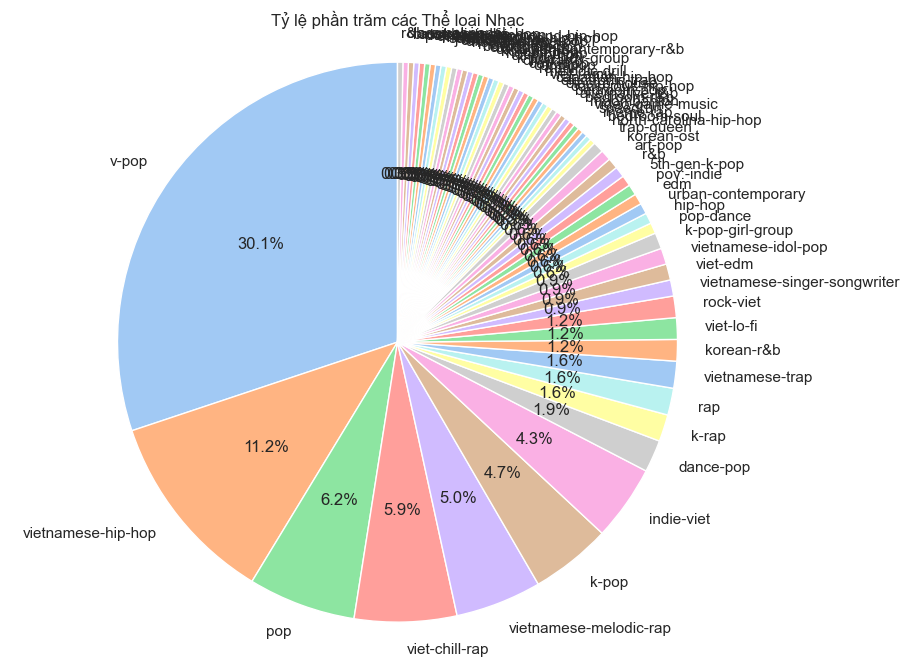

In [183]:
genre_counts = data['genre'].value_counts()

# 
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))

plt.title('Tỷ lệ phần trăm các Thể loại Nhạc')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()

In [184]:
# Liệt kê các thể loại nhạc duy nhất
unique_genres = data['genre'].unique()

print("Các thể loại nhạc:")
for genre in unique_genres:
    print(genre)

Các thể loại nhạc:
v-pop
vietnamese-hip-hop
viet-chill-rap
pop
vietnamese-melodic-rap
k-pop-girl-group
indie-viet
rock-viet
None
vietnamese-singer-songwriter
k-pop
k-rap
r&b
dance-pop
viet-edm
korean-r&b
viet-lo-fi
houston-rap
rap
trap-queen
korean-ost
korean-pop
art-pop
vietnamese-trap
5th-gen-k-pop
canadian-contemporary-r&b
canadian-pop
baroque-pop
modern-rock
neo-mellow
uk-alternative-pop
atl-hip-hop
contemporary-r&b
south-carolina-hip-hop
urban-contemporary
dfw-rap
melodic-rap
deep-underground-hip-hop
hip-hop
kentucky-hip-hop
pop-rap
vietnamese-idol-pop
australian-hip-hop
brooklyn-indie
pov:-indie
classical
j-division
k-pop-boy-group
canadian-hip-hop
dark-trap
meme-rap
speedrun
video-game-music
bedroom-r&b
alternative-r&b
bedroom-soul
bedroom-pop
edm
electronic-trap
pop-dance
viet-remix
melodic-drill
r&drill
cantopop
conscious-hip-hop
north-carolina-hip-hop
electro-house
moombahton
r&b-en-espanol


In [185]:
def determine_main_genre(genres):
    if pd.isna(genres):
        return None  # Giữ giá trị NULL
    genre_lower = genres.lower()
    if 'rap' in genre_lower or 'hip-hop' in genre_lower or 'r&b' in genre_lower or 'lo-fi' in genre_lower \
       or 'trap' in genre_lower or 'soul' in genre_lower or 'drill' in genre_lower or 'r&drill' in genre_lower \
       or 'pop-rap' in genre_lower:
        return 'hip-hop'
    elif 'rock' in genre_lower:
        return 'rock'
    elif 'edm' in genre_lower or 'remix' in genre_lower or 'house' in genre_lower:
        return 'edm'
    elif 'pop' in genre_lower or 'indie' in genre_lower:
        return 'pop'
    else:
        return 'other'
# 3. Áp dụng hàm để tạo cột main_genre
data['main_genre'] = data['genre'].apply(determine_main_genre)

# 4. Xem kết quả
data[['id', 'name', 'genre', 'main_genre', 'popularity']].head(20)

,id,name,genre,main_genre,popularity
0,006RBJU7ScwRg9eouP4kJw,NICKY,v-pop,pop,54
1,01mNGTR498XaGe3xs1Otrz,GDucky,vietnamese-hip-hop,hip-hop,43
2,05xxXziuRhVsmlSjTD4Soh,Kuun Đức Nam,viet-chill-rap,hip-hop,45
3,06HL4z0CvFAxyc27GXpf02,Taylor Swift,pop,pop,100
4,0CO1IZAPmgTbkfXvcRCLsL,BAN,vietnamese-hip-hop,hip-hop,52
4,0CO1IZAPmgTbkfXvcRCLsL,BAN,vietnamese-melodic-rap,hip-hop,52
5,0KWdVd7ZYhtlm0CLHIFBya,Bằng Kiều,v-pop,pop,52
6,0LOK81e9H5lr61HlGGHqwA,XG,k-pop-girl-group,pop,72
7,0V2DfUrZvBuUReS1LFo5ZI,Ngọt,indie-viet,pop,58
7,0V2DfUrZvBuUReS1LFo5ZI,Ngọt,rock-viet,rock,58


In [186]:
# JSON quy đổi genre sang main_genre
genre_to_main_genre = {
    "pop": "pop", "art-pop": "pop", "viral-pop": "pop", "dance-pop": "pop", "synthpop": "pop",
    "electropop": "pop", "italian-pop": "pop", "classic-uk-pop": "pop", "k-pop": "pop",
    "french-pop": "pop", "canadian-pop": "pop", "jazz-pop": "pop", "bedroom-pop": "pop",
    "baroque-pop": "pop", "neo-mellow": "pop", "folk-pop": "pop", "new-romantic": "pop",
    "indie-pop": "pop", "uk-pop": "pop", "chill-pop": "pop", "pop-rock": "pop",
    "italian-adult-pop": "pop", "colombian-pop": "pop", "latin-pop": "pop", "puerto-rican-pop": "pop",
    "singer-songwriter-pop": "pop", "nz-pop": "pop", "korean-pop": "pop", "candy-pop": "pop",
    "trap-pop": "pop", "k-pop-boy-group": "pop", "k-pop-girl-group": "pop", "vocal-jazz-pop": "pop",
    "australian-pop": "pop", "modern-country-pop": "pop", "pop-dance": "pop", "classic-italian-pop": "pop",
    "contemporary-r&b-pop": "pop", "v-pop": "pop", "5th-gen-k-pop": "pop",
    "korean-ost": "pop", "viet-idol-pop": "pop", "cantopop": "pop", "uk-alternative-pop": "pop",

    "rock": "rock", "album-rock": "rock", "classic-rock": "rock", "heartland-rock": "rock",
    "soft-rock": "rock", "yacht-rock": "rock", "modern-rock": "rock", "piano-rock": "rock",
    "glam-rock": "rock", "psychedelic-rock": "rock", "country-rock": "rock", "folk-rock": "rock",
    "punk-rock": "rock", "alternative-rock": "rock", "britpop": "rock", "garage-rock": "rock",
    "country-dawn-rock": "rock", "sunshine-pop": "rock", "argentine-hip-hop-rock": "rock",
    "brooklyn-indie-rock": "rock", "indie-folk-rock": "rock", "sheffield-indie-rock": "rock",
    "rockabilly": "rock", "nashville-rock": "rock", "rock-viet": "rock",

    "jazz": "jazz", "neo-soul": "jazz", "vocal-jazz": "jazz", "classic-jazz": "jazz", "jazz-funk": "jazz",
    "smooth-jazz": "jazz", "soul-jazz": "jazz", "blues-jazz": "jazz", "bop-jazz": "jazz",

    "classical": "classical", "vocal-harmony-group": "classical", "baroque": "classical", "orchestra": "classical",

    "blues": "blues", "blues-rock": "blues", "soul": "blues", "southern-soul": "blues",
    "electric-blues": "blues", "indie-blues": "blues", "texas-blues": "blues",

    "hip-hop": "hip-hop", "chicago-hip-hop": "hip-hop", "detroit-hip-hop": "hip-hop",
    "southern-hip-hop": "hip-hop", "atl-trap": "hip-hop", "trap": "hip-hop", "rap": "hip-hop",
    "melodic-rap": "hip-hop", "new-york-hip-hop": "hip-hop", "west-coast-hip-hop": "hip-hop",
    "dirty-south-rap": "hip-hop", "atlanta-hip-hop": "hip-hop", "viet-chill-rap": "hip-hop",
    "vietnamese-hip-hop": "hip-hop", "vietnamese-melodic-rap": "hip-hop", "k-rap": "hip-hop",
    "houston-rap": "hip-hop", "trap-queen": "hip-hop", "vietnamese-trap": "hip-hop",
    "atl-hip-hop": "hip-hop", "south-carolina-hip-hop": "hip-hop", "urban-contemporary": "hip-hop",
    "dfw-rap": "hip-hop", "deep-underground-hip-hop": "hip-hop", "kentucky-hip-hop": "hip-hop",
    "pop-rap": "hip-hop", "australian-hip-hop": "hip-hop", "canadian-hip-hop": "hip-hop",
    "dark-trap": "hip-hop", "meme-rap": "hip-hop", "melodic-drill": "hip-hop", "r&drill": "hip-hop",
    "conscious-hip-hop": "hip-hop", "north-carolina-hip-hop": "hip-hop",

    "reggae": "reggae", "reggaeton": "reggae", "urbano": "reggae", "dancehall": "reggae",
    "caribbean-music": "reggae", "roots-reggae": "reggae", "classic-reggae": "reggae",

    "electronic": "electronic", "edm": "electronic", "house": "electronic", "trance": "electronic",
    "techno": "electronic", "dnb": "electronic", "drum-and-bass": "electronic", "electro-house": "electronic",
    "deep-house": "electronic", "jungle": "electronic", "rave": "electronic", "dutch-edm": "electronic",
    "viet-lo-fi": "electronic", "viet-edm": "electronic", "electronic-trap": "electronic", "viet-remix": "electronic",
    "moombahton": "electronic",

    "acoustic": "acoustic", "folk": "acoustic", "country": "acoustic", "americana": "acoustic",
    "roots-music": "acoustic", "bluegrass": "acoustic", "acoustic-guitar": "acoustic",
    "vietnamese-singer-songwriter": "acoustic", "bedroom-r&b": "acoustic", "bedroom-soul": "acoustic",

    "indie": "pop", "singer-songwriter": "other", "celtic": "other", "latin": "other", "corrido": "other",
    "pagode": "other", "samba": "other", "freestyle": "other", "plugg": "other", "emo": "other",
    "trap-metal": "other", "country-dawn": "other", "emo-trap": "other", "nan": "other", "indie-viet": "other",
    "korean-r&b": "other", "canadian-contemporary-r&b": "hip-hop", "contemporary-r&b": "hip-hop",
    "r&b": "hip-hop", "brooklyn-indie": "other", "pov:-indie": "other", "j-division": "other", "alternative-r&b": "hip-hop",
    "video-game-music": "other", "speedrun": "other", "r&b-en-espanol": "hip-hop"
}

# Giả sử bạn có DataFrame tên là `data` với cột 'genre'
# Tạo một hàm để quy đổi genre sang main_genre
def map_genre_to_main_genre(genre):
    return genre_to_main_genre.get(genre, 'other')  # Trả về 'other' nếu genre không có trong dictionary

# Áp dụng hàm cho cột genre trong DataFrame
data['main_genre'] = data['genre'].apply(map_genre_to_main_genre)

# Kiểm tra kết quả
print(data[['genre', 'main_genre']].head(10))

                    genre main_genre
0                   v-pop        pop
1      vietnamese-hip-hop    hip-hop
2          viet-chill-rap    hip-hop
3                     pop        pop
4      vietnamese-hip-hop    hip-hop
4  vietnamese-melodic-rap    hip-hop
5                   v-pop        pop
6        k-pop-girl-group        pop
7              indie-viet      other
7               rock-viet       rock


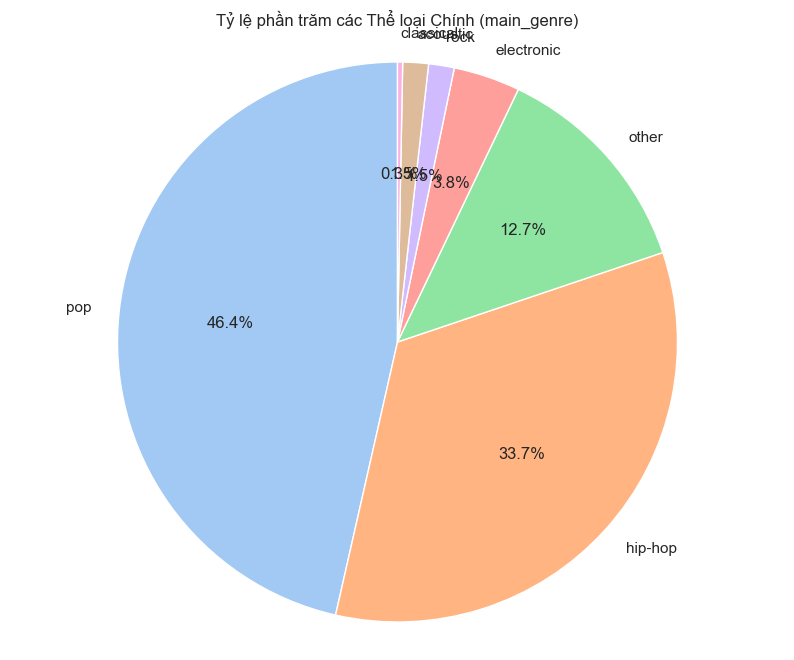

In [187]:
main_genre_counts = data['main_genre'].value_counts()

# Vẽ biểu đồ tròn cho main_genre
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")
plt.pie(main_genre_counts, labels=main_genre_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))

plt.title('Tỷ lệ phần trăm các Thể loại Chính (main_genre)')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()

In [217]:
# Tính tỷ lệ phần trăm của các thể loại
genre_counts = data['main_genre'].value_counts()
genre_percentages = (genre_counts / len(data)) * 100

# In kết quả
print("Tỷ lệ phần trăm của các thể loại:")
for genre, percent in genre_percentages.items():
    print(f"{genre}: {percent:.2f}%")

Tỷ lệ phần trăm của các thể loại:
pop: 46.45%
hip-hop: 33.73%
other: 12.72%
electronic: 3.85%
rock: 1.48%
acoustic: 1.48%
classical: 0.30%


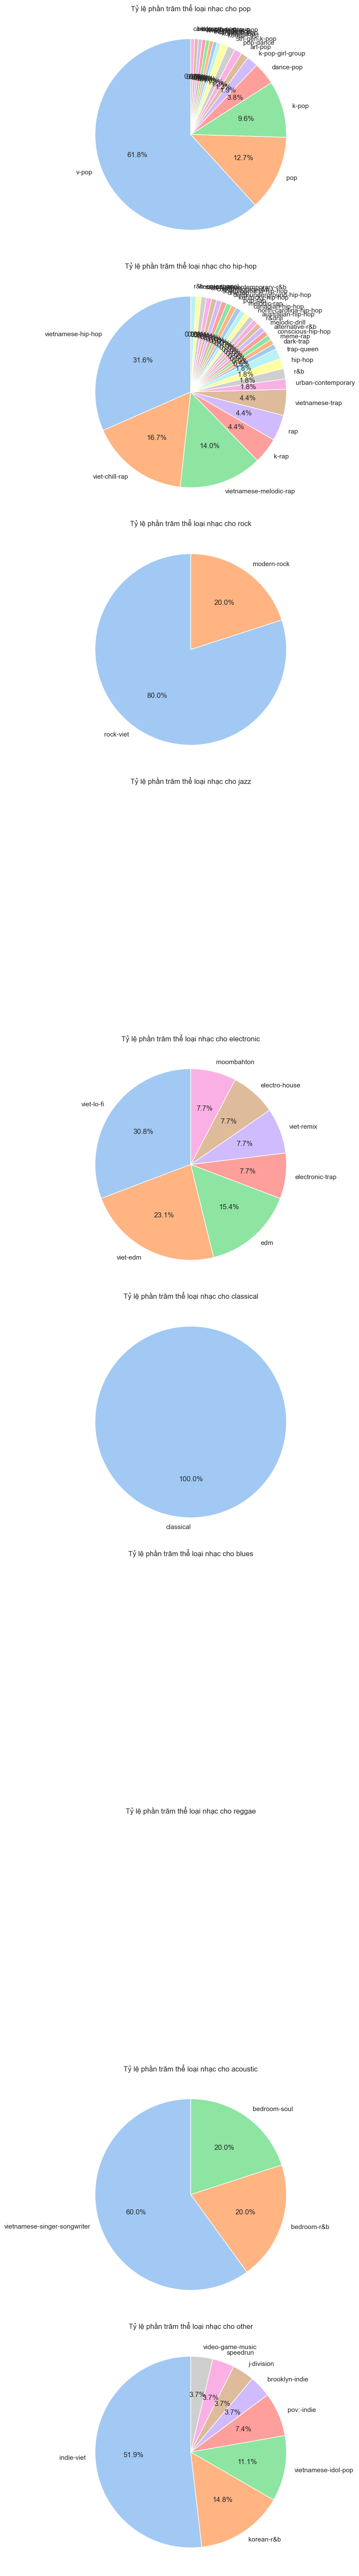

In [188]:
main_genres = ['pop', 'hip-hop', 'rock', 'jazz', 'electronic', 'classical', 'blues', 'reggae', 'acoustic', 'other']

# Vẽ biểu đồ tròn cho từng main_genre
plt.figure(figsize=(80, 60))

for i, main_genre in enumerate(main_genres):
    plt.subplot(10, 1, i + 1)  # Tạo lưới 3 hàng, 2 cột
    genre_counts = data[data['main_genre'] == main_genre]['genre'].value_counts()
    
    plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
    plt.title(f'Tỷ lệ phần trăm thể loại nhạc cho {main_genre}')

plt.tight_layout()
plt.show()

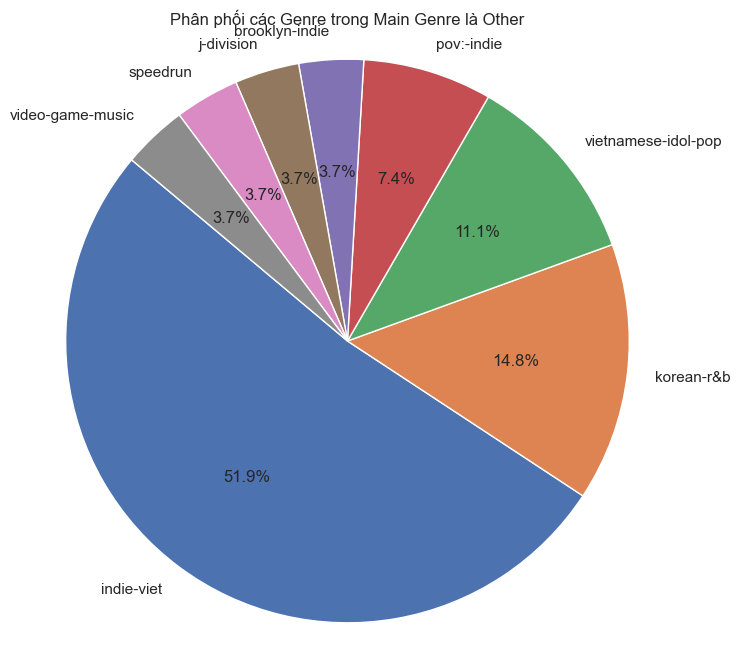

In [189]:
# Lọc các nghệ sĩ có main_genre là 'other'
other_artists = data[data['main_genre'] == 'other']

# Tính tần suất của các genre trong nhóm này
genre_counts = other_artists['genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

# Vẽ biểu đồ tròn với seaborn (thông qua matplotlib)
plt.figure(figsize=(8, 8))
sns.set_theme(style="whitegrid")

# Vẽ biểu đồ tròn
plt.pie(genre_counts['count'], labels=genre_counts['genre'], autopct='%1.1f%%', startangle=140)
plt.title('Phân phối các Genre trong Main Genre là Other')
plt.axis('equal')  # Đảm bảo biểu đồ tròn là hình tròn
plt.show()

In [190]:
genres_per_main_genre = data.groupby('main_genre')['genre'].unique()

# 5. In ra kết quả
for main_genre, genres in genres_per_main_genre.items():
    print(f"{main_genre}: {', '.join(filter(None, genres))}")

acoustic: vietnamese-singer-songwriter, bedroom-r&b, bedroom-soul
classical: classical
electronic: viet-edm, viet-lo-fi, edm, electronic-trap, viet-remix, electro-house, moombahton
hip-hop: vietnamese-hip-hop, viet-chill-rap, vietnamese-melodic-rap, k-rap, r&b, houston-rap, rap, trap-queen, vietnamese-trap, canadian-contemporary-r&b, atl-hip-hop, contemporary-r&b, south-carolina-hip-hop, urban-contemporary, dfw-rap, melodic-rap, deep-underground-hip-hop, hip-hop, kentucky-hip-hop, pop-rap, australian-hip-hop, canadian-hip-hop, dark-trap, meme-rap, alternative-r&b, melodic-drill, r&drill, conscious-hip-hop, north-carolina-hip-hop, r&b-en-espanol
other: indie-viet, korean-r&b, vietnamese-idol-pop, brooklyn-indie, pov:-indie, j-division, speedrun, video-game-music
pop: v-pop, pop, k-pop-girl-group, k-pop, dance-pop, korean-ost, korean-pop, art-pop, 5th-gen-k-pop, canadian-pop, baroque-pop, neo-mellow, uk-alternative-pop, k-pop-boy-group, bedroom-pop, pop-dance, cantopop
rock: rock-viet, m

In [191]:
# 4. Hàm để xác định main_genre_2
def determine_main_genre_2(row):
    main_genre = row['main_genre']
    genre = row['genre']

    # Nếu main_genre là NULL, edm, other, rock thì trả về NULL
    if main_genre in [None, 'acoustic', 'classical', 'electronic', 'other', 'rock']:
        return None

    if main_genre == 'hip-hop':
        if 'rap' in genre:
            return 'rap'
        elif 'r&b' in genre:
            return 'r&b'
        elif 'lo-fi' in genre:
            return 'lo-fi'
        elif 'trap' in genre:
            return 'trap'
        elif 'soul' in genre:
            return 'soul'
        elif 'drill' in genre:
            return 'drill'
        elif 'hip-hop' in genre:
            return 'other'
    
    elif main_genre == 'pop':
        if 'v-pop' in genre:
            return 'v-pop'
        elif 'k-pop' in genre:
            return 'k-pop'
        elif 'indie' in genre:
            return 'indie'
        elif 'pop' in genre:  # Chỉ trả về 'pop' nếu genre là 'pop'
            return 'other'
    
    return None

# 5. Áp dụng hàm để tạo cột main_genre_2
data['main_genre_2'] = data.apply(determine_main_genre_2, axis=1)

# 6. Xem kết quả
data[['id', 'name', 'genre', 'main_genre', 'main_genre_2', 'popularity']].head(50)

,id,name,genre,main_genre,main_genre_2,popularity
0,006RBJU7ScwRg9eouP4kJw,NICKY,v-pop,pop,v-pop,54
1,01mNGTR498XaGe3xs1Otrz,GDucky,vietnamese-hip-hop,hip-hop,other,43
2,05xxXziuRhVsmlSjTD4Soh,Kuun Đức Nam,viet-chill-rap,hip-hop,rap,45
3,06HL4z0CvFAxyc27GXpf02,Taylor Swift,pop,pop,other,100
4,0CO1IZAPmgTbkfXvcRCLsL,BAN,vietnamese-hip-hop,hip-hop,other,52
4,0CO1IZAPmgTbkfXvcRCLsL,BAN,vietnamese-melodic-rap,hip-hop,rap,52
5,0KWdVd7ZYhtlm0CLHIFBya,Bằng Kiều,v-pop,pop,v-pop,52
6,0LOK81e9H5lr61HlGGHqwA,XG,k-pop-girl-group,pop,k-pop,72
7,0V2DfUrZvBuUReS1LFo5ZI,Ngọt,indie-viet,other,None,58
7,0V2DfUrZvBuUReS1LFo5ZI,Ngọt,rock-viet,rock,None,58


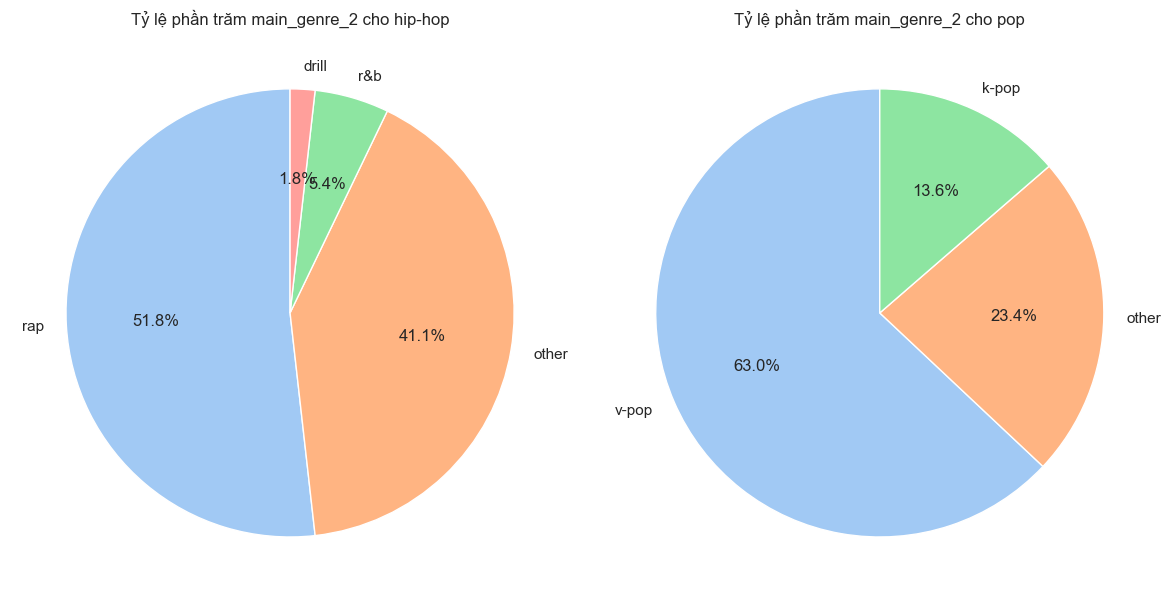

In [192]:
plt.figure(figsize=(12, 6))

# Biểu đồ cho hip-hop
plt.subplot(1, 2, 1)  # 1 hàng, 2 cột, biểu đồ đầu tiên
hiphop_counts = data[data['main_genre'] == 'hip-hop']['main_genre_2'].value_counts()
plt.pie(hiphop_counts, labels=hiphop_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Tỷ lệ phần trăm main_genre_2 cho hip-hop')

# Biểu đồ cho pop
plt.subplot(1, 2, 2)  # 1 hàng, 2 cột, biểu đồ thứ hai
pop_counts = data[data['main_genre'] == 'pop']['main_genre_2'].value_counts()
plt.pie(pop_counts, labels=pop_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Tỷ lệ phần trăm main_genre_2 cho pop')

plt.tight_layout()
plt.show()

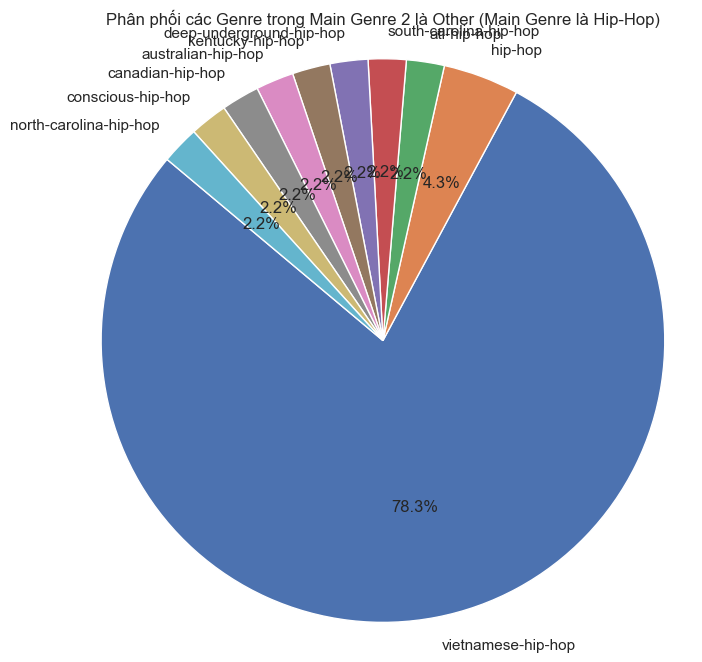

In [193]:
# Lọc các nghệ sĩ có main_genre là 'hip-hop' và main_genre_2 là 'other'
hiphop_other_artists = data[(data['main_genre'] == 'hip-hop') & (data['main_genre_2'] == 'other')]

# Tính tần suất của các genre trong main_genre_2
genre_counts = hiphop_other_artists['genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(genre_counts['count'], labels=genre_counts['genre'], autopct='%1.1f%%', startangle=140)
plt.title('Phân phối các Genre trong Main Genre 2 là Other (Main Genre là Hip-Hop)')
plt.axis('equal')  # Đảm bảo biểu đồ tròn là hình tròn
plt.show()

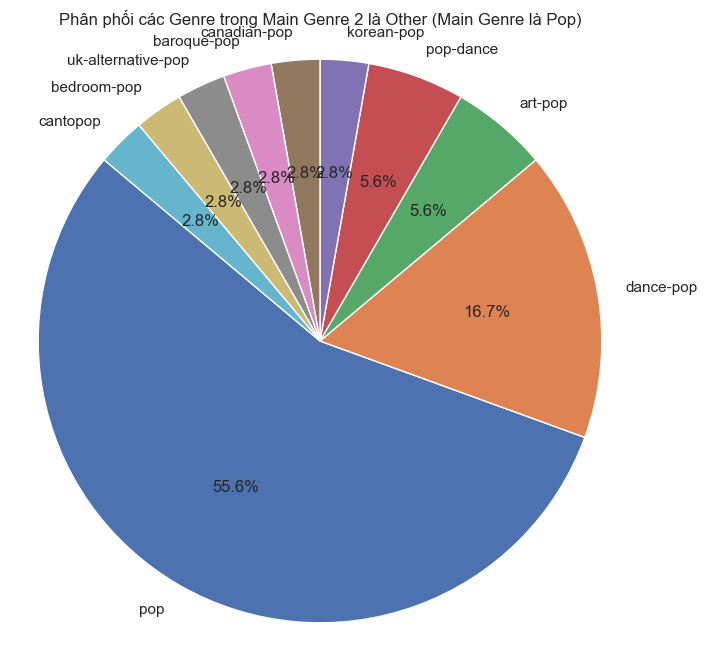

In [194]:
# Lọc các nghệ sĩ có main_genre là 'pop' và main_genre_2 là 'other'
pop_other_artists = data[(data['main_genre'] == 'pop') & (data['main_genre_2'] == 'other')]

# Tính tần suất của các genre trong main_genre_2
genre_counts = pop_other_artists['genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(genre_counts['count'], labels=genre_counts['genre'], autopct='%1.1f%%', startangle=140)
plt.title('Phân phối các Genre trong Main Genre 2 là Other (Main Genre là Pop)')
plt.axis('equal')  # Đảm bảo biểu đồ tròn là hình tròn
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_7580\1351996857.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='main_genre', y='popularity', data=mean_popularity, palette='viridis')


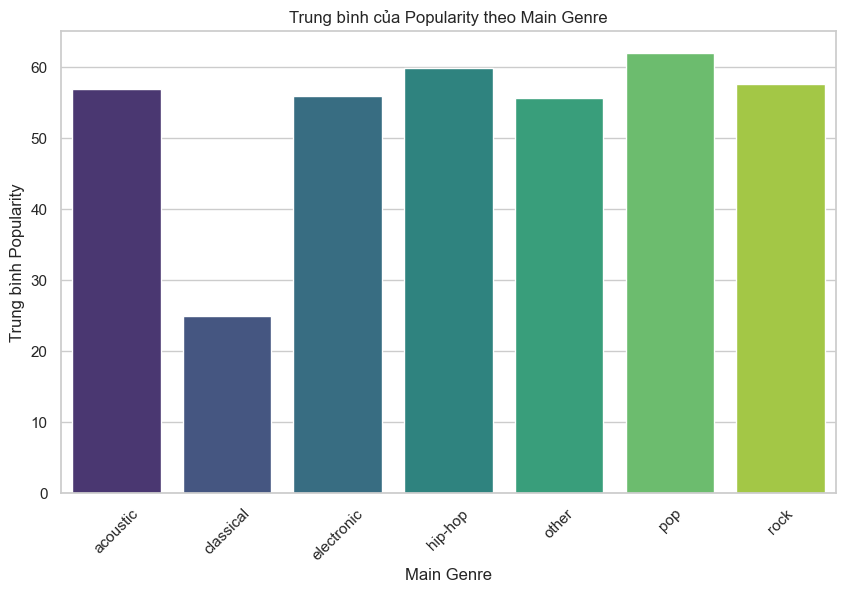

In [195]:
# 6. Loại bỏ các bản ghi trùng lặp dựa trên ca sĩ và main_genre
unique_data = data.drop_duplicates(subset=['name', 'main_genre'])

# 7. Tính trung bình của popularity cho mỗi main_genre
mean_popularity = unique_data.groupby('main_genre')['popularity'].mean().reset_index()

# 8. Vẽ biểu đồ cột cho popularity theo main_genre
plt.figure(figsize=(10, 6))
sns.barplot(x='main_genre', y='popularity', data=mean_popularity, palette='viridis')
plt.title('Trung bình của Popularity theo Main Genre')
plt.xlabel('Main Genre')
plt.ylabel('Trung bình Popularity')
plt.xticks(rotation=45)
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_7580\2963678854.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='main_genre_2', y='popularity', data=mean_popularity_hiphop, palette='viridis')
C:\Users\PC\AppData\Local\Temp\ipykernel_7580\2963678854.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='main_genre_2', y='popularity', data=mean_popularity_pop, palette='viridis')


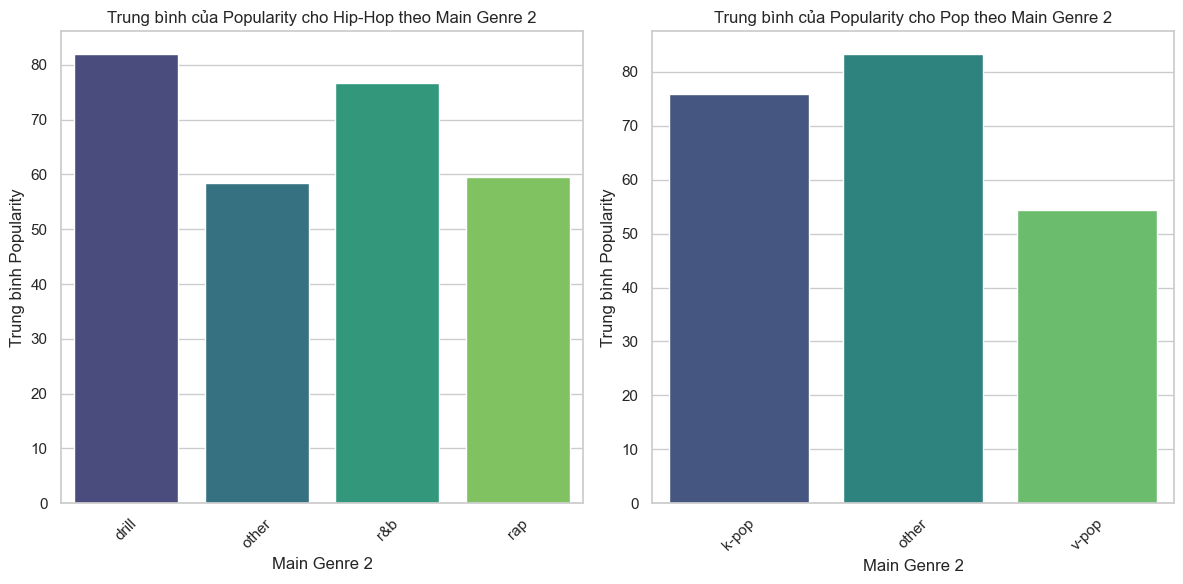

In [196]:
# 6. Loại bỏ các bản ghi trùng lặp dựa trên ca sĩ và main_genre_2
unique_data = data.drop_duplicates(subset=['name', 'main_genre_2'])

# 7. Tính trung bình của popularity cho từng main_genre_2 cho hip-hop và pop
mean_popularity_hiphop = unique_data[unique_data['main_genre'] == 'hip-hop'] \
                          .groupby('main_genre_2')['popularity'].mean().reset_index()

mean_popularity_pop = unique_data[unique_data['main_genre'] == 'pop'] \
                      .groupby('main_genre_2')['popularity'].mean().reset_index()

# 8. Vẽ biểu đồ cột cho popularity theo main_genre_2 cho hip-hop
plt.figure(figsize=(12, 6))

# Biểu đồ cho hip-hop
plt.subplot(1, 2, 1)  # 1 hàng, 2 cột, biểu đồ đầu tiên
sns.barplot(x='main_genre_2', y='popularity', data=mean_popularity_hiphop, palette='viridis')
plt.title('Trung bình của Popularity cho Hip-Hop theo Main Genre 2')
plt.xlabel('Main Genre 2')
plt.ylabel('Trung bình Popularity')
plt.xticks(rotation=45)

# Biểu đồ cho pop
plt.subplot(1, 2, 2)  # 1 hàng, 2 cột, biểu đồ thứ hai
sns.barplot(x='main_genre_2', y='popularity', data=mean_popularity_pop, palette='viridis')
plt.title('Trung bình của Popularity cho Pop theo Main Genre 2')
plt.xlabel('Main Genre 2')
plt.ylabel('Trung bình Popularity')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [197]:
# Thêm cột nhị phân 'vietnamese'
def is_vietnamese(genre):
    if pd.isna(genre):
        return 0
    if any(keyword in genre.lower() for keyword in ["v-", "viet", "vietnamese"]):
        return 1
    return 0

data['vietnamese'] = data['genre'].apply(is_vietnamese)

# Xem kết quả
data[data['vietnamese'] == 1]

,id,name,genre,popularity,main_genre,main_genre_2,vietnamese
0,006RBJU7ScwRg9eouP4kJw,NICKY,v-pop,54,pop,v-pop,1
1,01mNGTR498XaGe3xs1Otrz,GDucky,vietnamese-hip-hop,43,hip-hop,other,1
2,05xxXziuRhVsmlSjTD4Soh,Kuun Đức Nam,viet-chill-rap,45,hip-hop,rap,1
4,0CO1IZAPmgTbkfXvcRCLsL,BAN,vietnamese-hip-hop,52,hip-hop,other,1
4,0CO1IZAPmgTbkfXvcRCLsL,BAN,vietnamese-melodic-rap,52,hip-hop,rap,1
...,...,...,...,...,...,...,...
199,7Cp2hGcriAaDUAWpXnSEwm,buitruonglinh,indie-viet,57,other,None,1
199,7Cp2hGcriAaDUAWpXnSEwm,buitruonglinh,v-pop,57,pop,v-pop,1
200,7LLfmKhGZI11XO0dO4xDI7,Anh Tú,v-pop,55,pop,v-pop,1
203,7rpD9lGecstoaVj2vGXUex,Công Dương,v-pop,51,pop,v-pop,1


In [198]:
vietnamese_artists = data[data['vietnamese'] == 1]

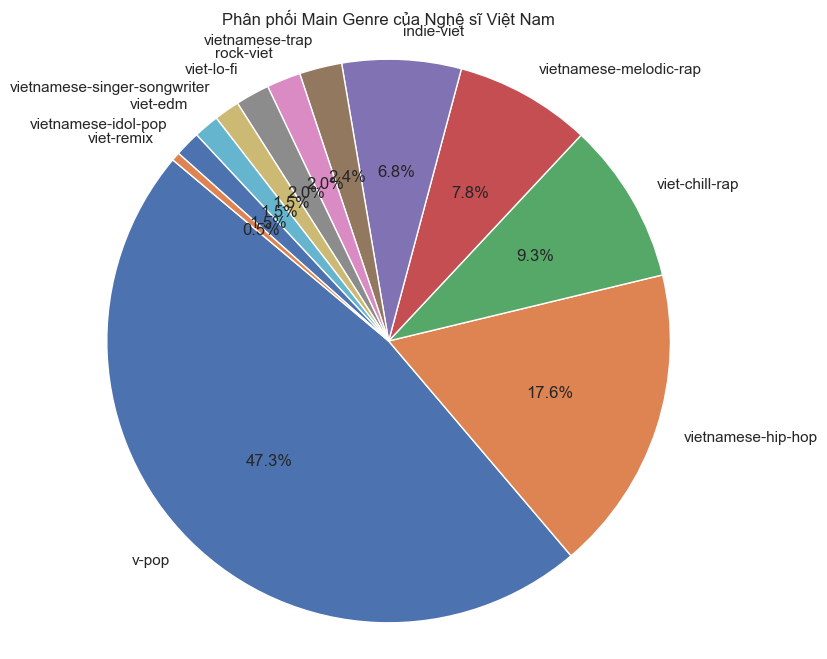

In [199]:
# Tính tần suất của từng main_genre
genre_counts = vietnamese_artists['genre'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Phân phối Main Genre của Nghệ sĩ Việt Nam')
plt.axis('equal')  # Đảm bảo biểu đồ tròn là hình tròn
plt.show()

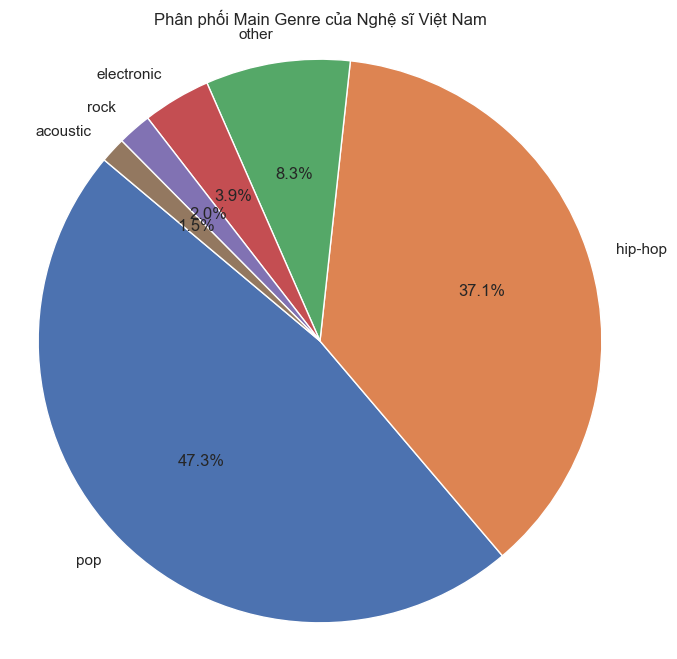

In [200]:
# Tính tần suất của từng main_genre
genre_counts = vietnamese_artists['main_genre'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Phân phối Main Genre của Nghệ sĩ Việt Nam')
plt.axis('equal')  # Đảm bảo biểu đồ tròn là hình tròn
plt.show()

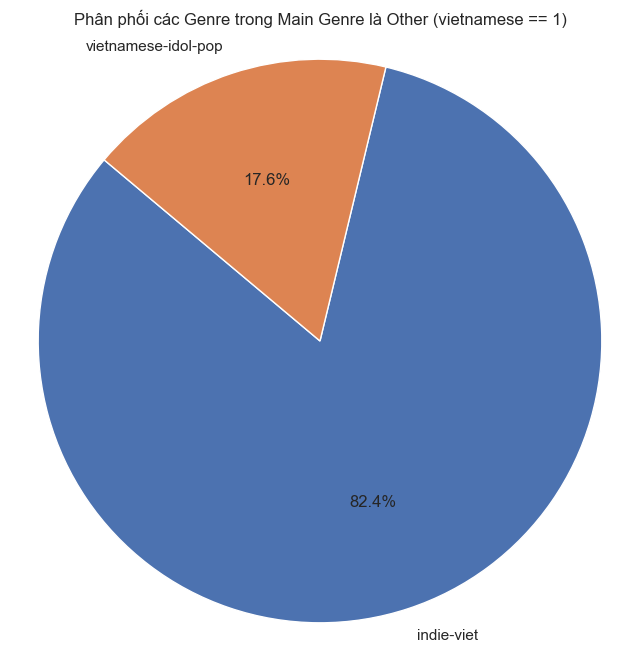

In [201]:
# Lọc các nghệ sĩ có vietnamese là 1 và main_genre là 'other'
other_artists = data[(data['vietnamese'] == 1) & (data['main_genre'] == 'other')]

# Tính tần suất của các genre trong nhóm này
genre_counts_other = other_artists['genre'].value_counts().reset_index()
genre_counts_other.columns = ['genre', 'count']

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(genre_counts_other['count'], labels=genre_counts_other['genre'], autopct='%1.1f%%', startangle=140)
plt.title('Phân phối các Genre trong Main Genre là Other (vietnamese == 1)')
plt.axis('equal')  # Đảm bảo biểu đồ tròn là hình tròn
plt.show()

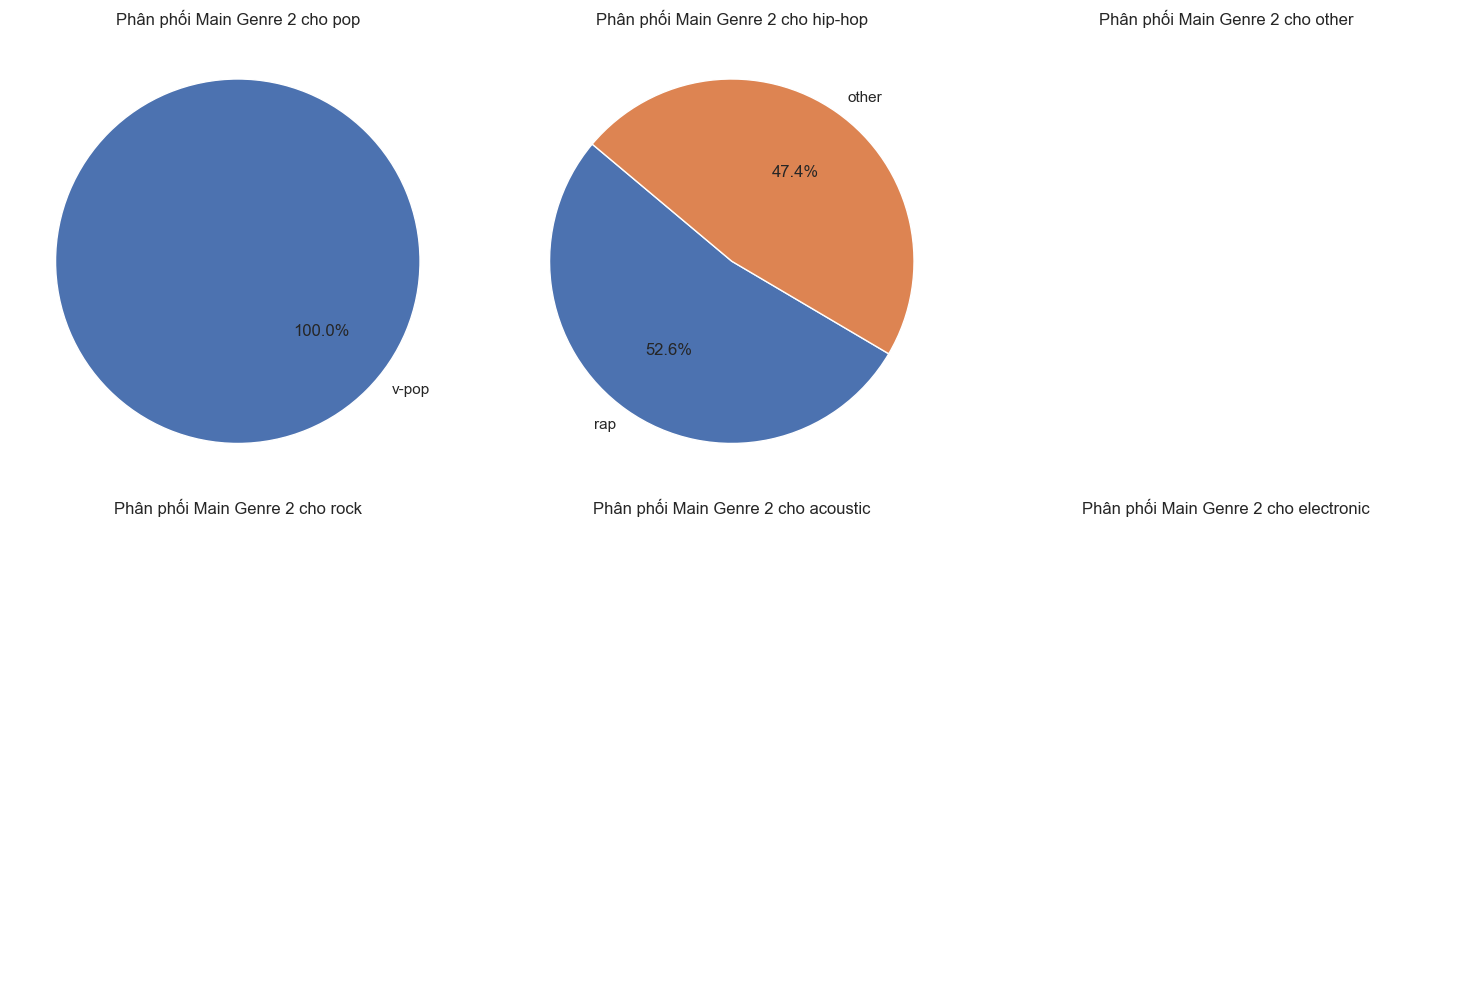

In [202]:
# Tạo các biểu đồ tròn cho từng genre
genres = vietnamese_artists['main_genre'].unique()

plt.figure(figsize=(15, 10))

for i, genre in enumerate(genres):
    plt.subplot(2, 3, i + 1)  # Tạo lưới 2x3
    genre_data = vietnamese_artists[vietnamese_artists['main_genre'] == genre]
    genre_counts = genre_data['main_genre_2'].value_counts()
    
    plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Phân phối Main Genre 2 cho {genre}')

plt.tight_layout()
plt.show()

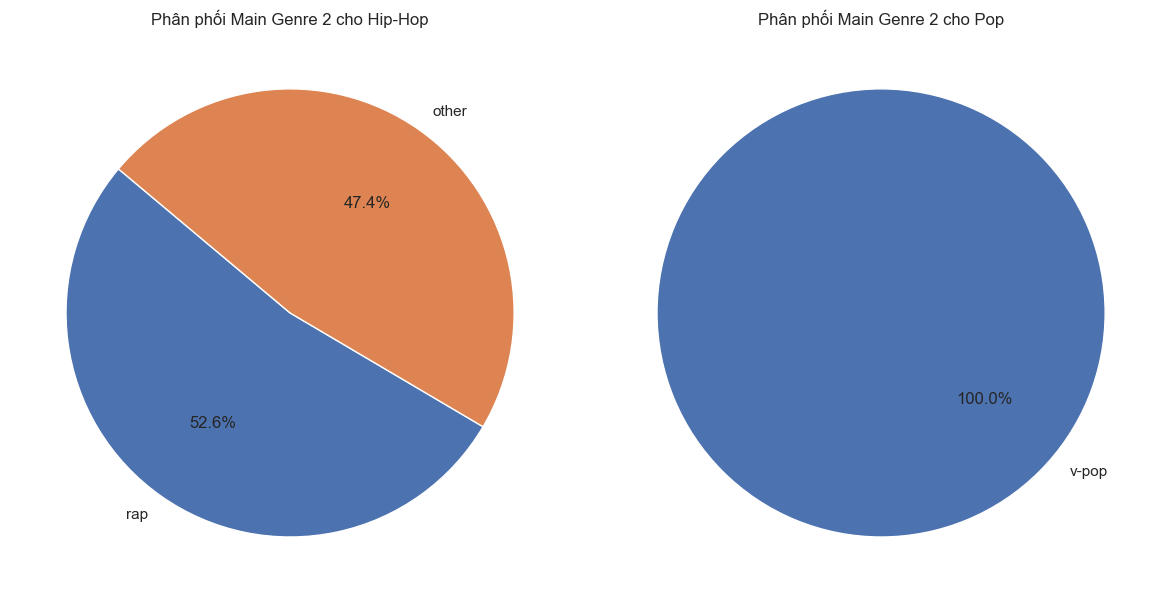

In [203]:
# Lọc dữ liệu cho hip-hop và pop
hiphop_artists = vietnamese_artists[vietnamese_artists['main_genre'] == 'hip-hop']
pop_artists = vietnamese_artists[vietnamese_artists['main_genre'] == 'pop']

# Vẽ biểu đồ tròn cho hip-hop
plt.figure(figsize=(12, 6))

# Hip-hop
plt.subplot(1, 2, 1)
hiphop_counts = hiphop_artists['main_genre_2'].value_counts()
plt.pie(hiphop_counts, labels=hiphop_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Phân phối Main Genre 2 cho Hip-Hop')

# Pop
plt.subplot(1, 2, 2)
pop_counts = pop_artists['main_genre_2'].value_counts()
plt.pie(pop_counts, labels=pop_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Phân phối Main Genre 2 cho Pop')

plt.tight_layout()
plt.show()

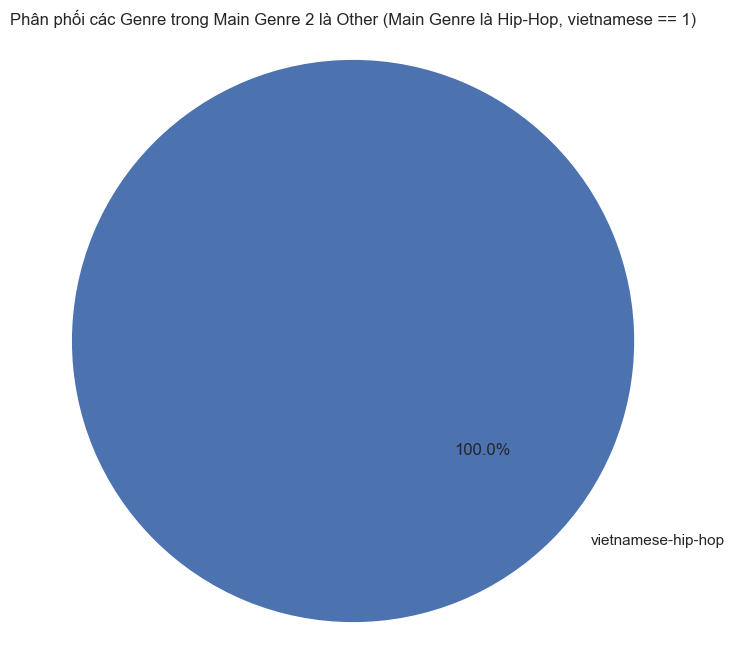

In [204]:
# Lọc các nghệ sĩ có vietnamese là 1, main_genre là 'hip-hop' và main_genre_2 là 'other'
hiphop_other_artists = data[(data['vietnamese'] == 1) & (data['main_genre'] == 'hip-hop') & (data['main_genre_2'] == 'other')]

# Tính tần suất của các genre trong main_genre_2
genre_counts_hiphop_other = hiphop_other_artists['genre'].value_counts().reset_index()
genre_counts_hiphop_other.columns = ['genre', 'count']

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(genre_counts_hiphop_other['count'], labels=genre_counts_hiphop_other['genre'], autopct='%1.1f%%', startangle=140)
plt.title('Phân phối các Genre trong Main Genre 2 là Other (Main Genre là Hip-Hop, vietnamese == 1)')
plt.axis('equal')  # Đảm bảo biểu đồ tròn là hình tròn
plt.show()

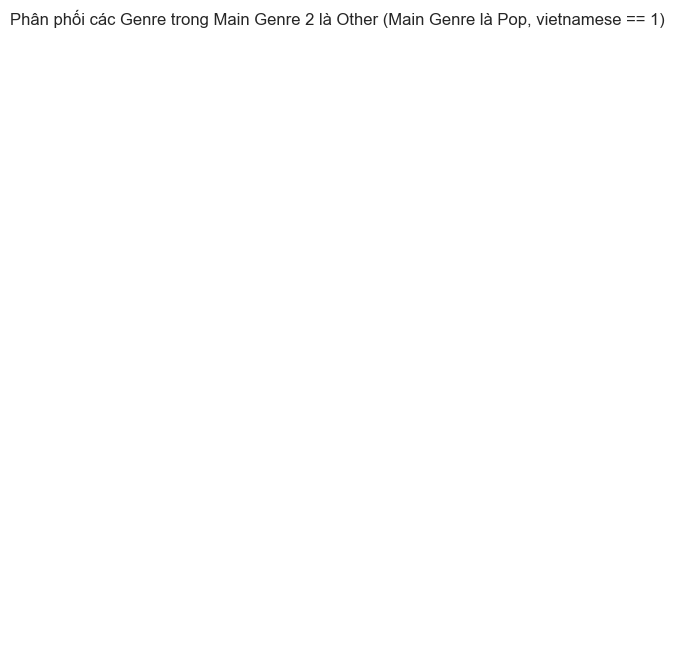

In [205]:
# Lọc các nghệ sĩ có vietnamese là 1, main_genre là 'pop' và main_genre_2 là 'other'
pop_other_artists = data[(data['vietnamese'] == 1) & (data['main_genre'] == 'pop') & (data['main_genre_2'] == 'other')]

# Tính tần suất của các genre trong main_genre_2
genre_counts_pop_other = pop_other_artists['genre'].value_counts().reset_index()
genre_counts_pop_other.columns = ['genre', 'count']

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(genre_counts_pop_other['count'], labels=genre_counts_pop_other['genre'], autopct='%1.1f%%', startangle=140)
plt.title('Phân phối các Genre trong Main Genre 2 là Other (Main Genre là Pop, vietnamese == 1)')
plt.axis('equal')  # Đảm bảo biểu đồ tròn là hình tròn
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_7580\1470194994.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='main_genre', y='popularity', data=mean_popularity, palette='viridis')


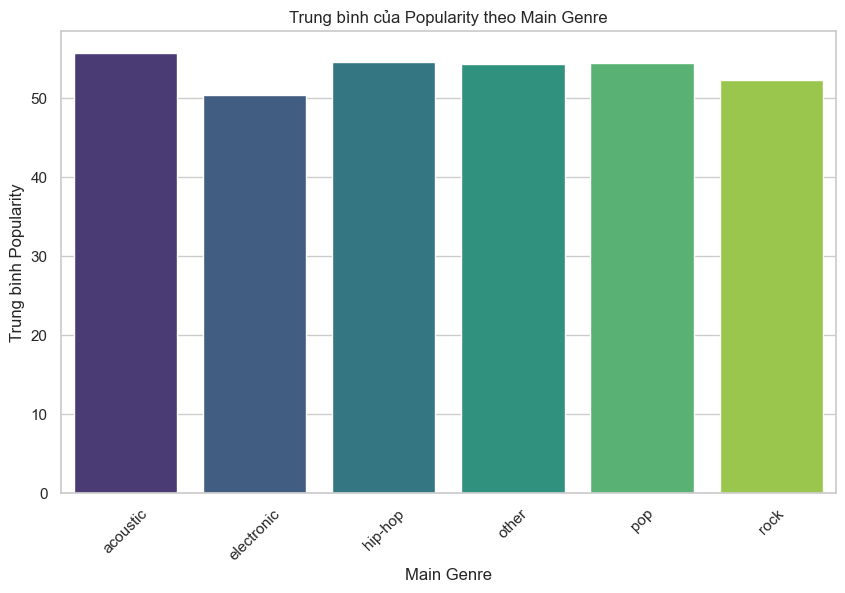

In [206]:
# Tính trung bình của popularity theo main_genre
mean_popularity = vietnamese_artists.groupby('main_genre')['popularity'].mean().reset_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(x='main_genre', y='popularity', data=mean_popularity, palette='viridis')
plt.title('Trung bình của Popularity theo Main Genre')
plt.xlabel('Main Genre')
plt.ylabel('Trung bình Popularity')
plt.xticks(rotation=45)
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_7580\2003166240.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='genre', y='popularity', data=mean_popularity, palette='viridis')


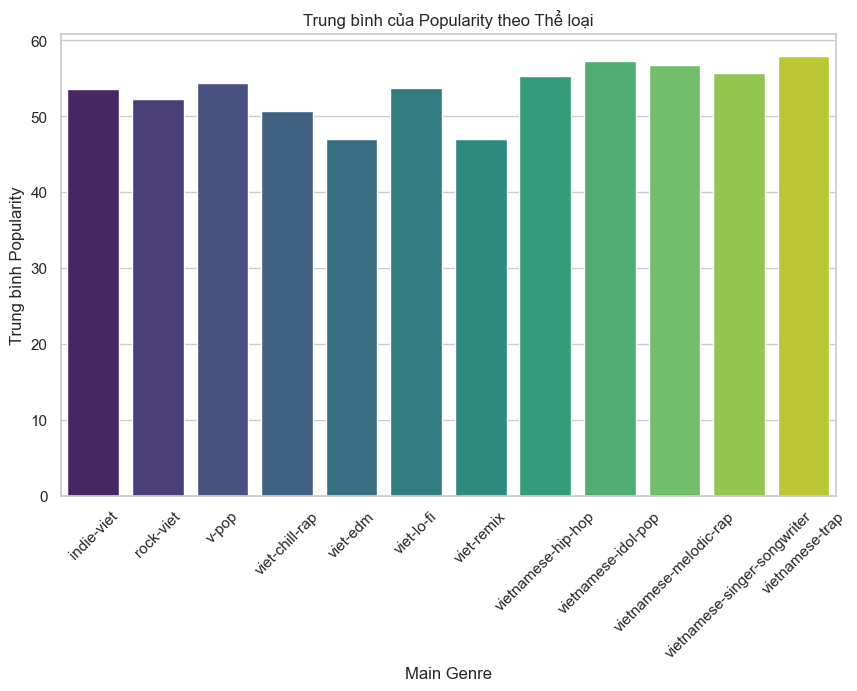

In [218]:
# Tính trung bình của popularity theo main_genre
mean_popularity = vietnamese_artists.groupby('genre')['popularity'].mean().reset_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(x='genre', y='popularity', data=mean_popularity, palette='viridis')
plt.title('Trung bình của Popularity theo Thể loại')
plt.xlabel('Main Genre')
plt.ylabel('Trung bình Popularity')
plt.xticks(rotation=45)
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_7580\326671086.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='main_genre_2', y='popularity', data=mean_popularity_hiphop, palette='viridis')
C:\Users\PC\AppData\Local\Temp\ipykernel_7580\326671086.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='main_genre_2', y='popularity', data=mean_popularity_pop, palette='viridis')


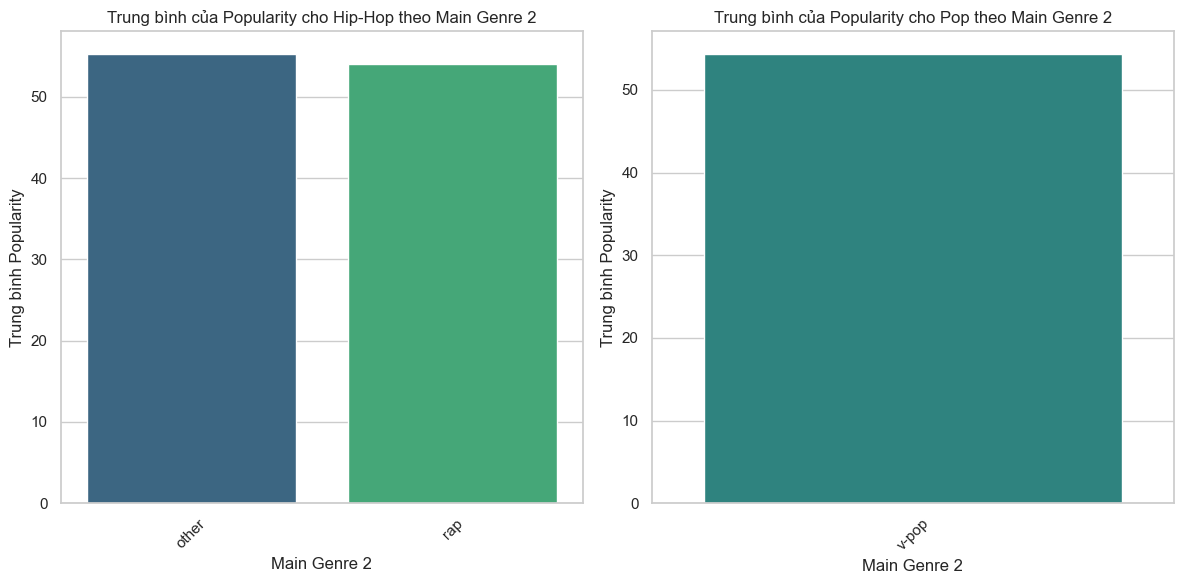

In [207]:
# Tính trung bình của popularity cho từng main_genre_2 cho hip-hop và pop
mean_popularity_hiphop = hiphop_artists.groupby('main_genre_2')['popularity'].mean().reset_index()
mean_popularity_pop = pop_artists.groupby('main_genre_2')['popularity'].mean().reset_index()

# Vẽ biểu đồ cột cho hip-hop
plt.figure(figsize=(12, 6))

# Biểu đồ cho hip-hop
plt.subplot(1, 2, 1)
sns.barplot(x='main_genre_2', y='popularity', data=mean_popularity_hiphop, palette='viridis')
plt.title('Trung bình của Popularity cho Hip-Hop theo Main Genre 2')
plt.xlabel('Main Genre 2')
plt.ylabel('Trung bình Popularity')
plt.xticks(rotation=45)

# Biểu đồ cho pop
plt.subplot(1, 2, 2)
sns.barplot(x='main_genre_2', y='popularity', data=mean_popularity_pop, palette='viridis')
plt.title('Trung bình của Popularity cho Pop theo Main Genre 2')
plt.xlabel('Main Genre 2')
plt.ylabel('Trung bình Popularity')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [208]:
sorted_vietnamese_artists = vietnamese_artists.sort_values(by='popularity', ascending=False)

# Hiển thị các cột cần thiết
sorted_vietnamese_artists[['id', 'name', 'main_genre', 'popularity']].head(20)

,id,name,main_genre,popularity
145,5HZtdKfC4xU0wvhEyYDWiY,HIEUTHUHAI,pop,70
145,5HZtdKfC4xU0wvhEyYDWiY,HIEUTHUHAI,hip-hop,70
103,3diftVOq7aEIebXKkC34oR,tlinh,other,68
103,3diftVOq7aEIebXKkC34oR,tlinh,pop,68
103,3diftVOq7aEIebXKkC34oR,tlinh,hip-hop,68
103,3diftVOq7aEIebXKkC34oR,tlinh,hip-hop,68
177,6TITnFVRcl0AcZ4syE7Toe,Low G,hip-hop,67
141,57g2v7gJZepcwsuwssIfZs,Vũ.,other,67
141,57g2v7gJZepcwsuwssIfZs,Vũ.,rock,67
141,57g2v7gJZepcwsuwssIfZs,Vũ.,pop,67


In [219]:
# Nhóm theo id và name, chọn thể loại với ưu tiên
def prioritize_genres(group):
    # Nếu có genre khác pop, chọn genre khác
    if (group['main_genre'] != 'pop').any():
        return group[group['main_genre'] != 'pop'].iloc[0]  # Chọn bản ghi đầu tiên không phải pop
    else:
        return group.iloc[0]  # Nếu chỉ có pop, chọn bản ghi đầu tiên

# Nhóm theo id và name, sau đó áp dụng hàm ưu tiên
unique_artists = vietnamese_artists.groupby(['id', 'name']).apply(prioritize_genres).reset_index(drop=True)

# Sắp xếp theo popularity giảm dần
sorted_artists = unique_artists.sort_values(by='popularity', ascending=False)

# Hiển thị các cột cần thiết
result = sorted_artists[['id', 'name', 'genre', 'main_genre', 'popularity']]
result

C:\Users\PC\AppData\Local\Temp\ipykernel_7580\1146469549.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  unique_artists = vietnamese_artists.groupby(['id', 'name']).apply(prioritize_genres).reset_index(drop=True)


,id,name,genre,main_genre,popularity
100,5HZtdKfC4xU0wvhEyYDWiY,HIEUTHUHAI,vietnamese-hip-hop,hip-hop,70
73,3diftVOq7aEIebXKkC34oR,tlinh,indie-viet,other,68
97,57g2v7gJZepcwsuwssIfZs,Vũ.,indie-viet,other,67
118,6TITnFVRcl0AcZ4syE7Toe,Low G,vietnamese-hip-hop,hip-hop,67
28,1W2pigH6UYwuTuFbwoSfVZ,RHYDER,v-pop,pop,66
...,...,...,...,...,...
117,6NmGVS8nPcqW6tnevWF3Zg,Trung Tu,v-pop,pop,41
131,79BbybQeUyNyFB8ghq4neb,Nomovodka,v-pop,pop,39
91,4jIoCS5bJr2TQ2SIbSPnwR,16 BrT,vietnamese-hip-hop,hip-hop,38
45,2KgvVPpQC2PQR0Vtb1zgT9,Thỏ Trauma,indie-viet,other,30


In [220]:
result.head(50)

,id,name,genre,main_genre,popularity
100,5HZtdKfC4xU0wvhEyYDWiY,HIEUTHUHAI,vietnamese-hip-hop,hip-hop,70
73,3diftVOq7aEIebXKkC34oR,tlinh,indie-viet,other,68
97,57g2v7gJZepcwsuwssIfZs,Vũ.,indie-viet,other,67
118,6TITnFVRcl0AcZ4syE7Toe,Low G,vietnamese-hip-hop,hip-hop,67
28,1W2pigH6UYwuTuFbwoSfVZ,RHYDER,v-pop,pop,66
89,4fg8aMZ23d2bxKz7r2vt9v,Negav,vietnamese-hip-hop,hip-hop,65
37,1zSv9qZANOWB4HRE8sxeTL,RPT MCK,vietnamese-hip-hop,hip-hop,64
105,5dfZ5uSmzR7VQK0udbAVpf,Sơn Tùng M-TP,vietnamese-idol-pop,other,64
16,0slOzRzTQb1RBBVJbvRITP,Quang Hùng MasterD,v-pop,pop,63
50,2aQnC3DbZB9GbauvhAw7ve,AMEE,vietnamese-idol-pop,other,63


In [221]:
non_vietnamese_artists = data[data['vietnamese'] == 0]

In [225]:
# Nhóm theo id và name, sau đó áp dụng hàm ưu tiên
unique_artists = non_vietnamese_artists.groupby(['id', 'name']).apply(prioritize_genres).reset_index(drop=True)

# Sắp xếp theo popularity giảm dần
sorted_artists = unique_artists.sort_values(by='popularity', ascending=False)

# Hiển thị các cột cần thiết
result = sorted_artists[['id', 'name', 'genre', 'main_genre', 'popularity']]
result

C:\Users\PC\AppData\Local\Temp\ipykernel_7580\3977892825.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  unique_artists = non_vietnamese_artists.groupby(['id', 'name']).apply(prioritize_genres).reset_index(drop=True)


,id,name,genre,main_genre,popularity
0,06HL4z0CvFAxyc27GXpf02,Taylor Swift,pop,pop,100
65,6qqNVTkY8uBg9cP3Jd7DAH,Billie Eilish,art-pop,pop,96
11,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,canadian-contemporary-r&b,hip-hop,96
5,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,dance-pop,pop,96
68,74KM79TiuVKeVCqs8QtB0B,Sabrina Carpenter,pop,pop,95
...,...,...,...,...,...
54,61ydMyohF67xBZmWSPA3YQ,Chọn gì? Chọn đi!,None,other,38
45,54gIDmy6EgICaX1Uiez1iC,DMT,None,other,37
63,6c7kFoIy4IC56Pr5605Jnt,summerdayy,None,other,32
24,38OwdN8usl5rnYYYK006C3,Quyền Thiện Đắc,classical,classical,25


In [226]:
result.head(50)

,id,name,genre,main_genre,popularity
0,06HL4z0CvFAxyc27GXpf02,Taylor Swift,pop,pop,100
65,6qqNVTkY8uBg9cP3Jd7DAH,Billie Eilish,art-pop,pop,96
11,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,canadian-contemporary-r&b,hip-hop,96
5,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,dance-pop,pop,96
68,74KM79TiuVKeVCqs8QtB0B,Sabrina Carpenter,pop,pop,95
9,1HY2Jd0NmPuamShAr6KMms,Lady Gaga,art-pop,pop,92
56,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,pop,pop,92
16,246dkjvS1zLTtiykXe5h60,Post Malone,dfw-rap,hip-hop,91
13,1oSPZhvZMIrWW5I41kPkkY,Jimin,k-pop,pop,88
31,3Nrfpe0tUJi4K4DXYWgMUX,BTS,k-pop,pop,87


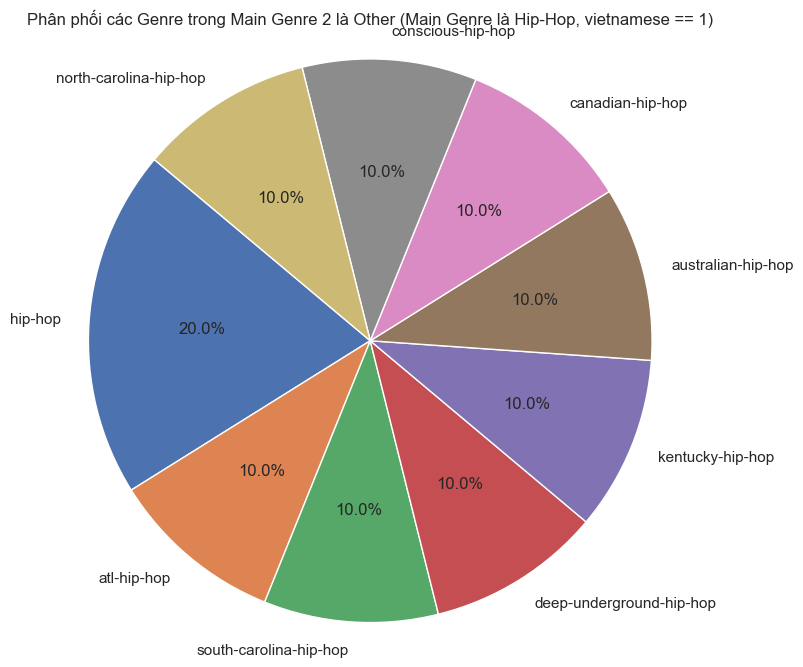

In [224]:
# Lọc các nghệ sĩ có vietnamese là 1, main_genre là 'hip-hop' và main_genre_2 là 'other'
hiphop_other_artists = data[(data['vietnamese'] == 0) & (data['main_genre'] == 'hip-hop') & (data['main_genre_2'] == 'other')]

# Tính tần suất của các genre trong main_genre_2
genre_counts_hiphop_other = hiphop_other_artists['genre'].value_counts().reset_index()
genre_counts_hiphop_other.columns = ['genre', 'count']

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(genre_counts_hiphop_other['count'], labels=genre_counts_hiphop_other['genre'], autopct='%1.1f%%', startangle=140)
plt.title('Phân phối các Genre trong Main Genre 2 là Other (Main Genre là Hip-Hop, vietnamese == 1)')
plt.axis('equal')  # Đảm bảo biểu đồ tròn là hình tròn
plt.show()